In [2]:
import serial
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.spatial.transform import Rotation as R

import math

def haversine(lat1, lon1, lat2, lon2):
      R = 6372.8 #km
      dLat = math.radians(lat2 - lat1)
      dLon = math.radians(lon2 - lon1)
      lat1 = math.radians(lat1)
      lat2 = math.radians(lat2)
      a = math.sin(dLat/2)**2 + math.cos(lat1)*math.cos(lat2)*math.sin(dLon/2)**2
      c = 2*math.asin(math.sqrt(a))
      return R * c

def bearing(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    Bearing = math.atan2(math.sin(dlon)*math.cos(lat2), 
                         math.cos(lat1)*math.sin(lat2)-math.sin(lat1)*math.cos(lat2)*math.cos(dlon))

    return Bearing

def extract_lon(l):
    l = str(l)
    # print("lon: ", l)
    return -float(l[:3]) - float(l[3:])/60.0 

def extract_lat(l):
    l = str(l)
    # print("lat: ", l)
    return float(l[:2]) + float(l[2:])/60.0 

In [31]:
class GPS_Interface:
    cols = ['Wall_Time',
        'header',
        'utc time',
        'Lat',
        'Lat_Dir',
        'Lon',
        'Lon _Dir',
        'Quality_Indicator',
        'Satellites Used',
        'HDOP',
        'Altitude',
        'Alt_units',
        'Geoidal_Separation',
        'GS_units',
        'DGPS_Station_ID',
        'checksum']

    types = [str, # header
         float, # utc time
         str, # lat
         str, # lat dir
         str, # lon
         str, # lon dir
         int, # quality indicator
         int, # N satellites
         float, # hdop
         float, # altitude
         str, # alt units
         float, #geoidal separation
         str, # gs units
         str, # dpgs station id
         str] # check sum
    
    gps_df = pd.DataFrame(columns=cols)
    
    def __init__(self, s_port='com14', baud=115200):
        self.ser = serial.Serial()
        ser_open = False
        attempts = 0

        #attempt to connect
        while not ser_open and attempts < 5:
            try:
                self.ser = serial.Serial(s_port, baud, timeout=None)
                ser_open = True
            except:
                print("Failed to open GPS serial port: ", attempts)
                
            if not ser_open:
                time.sleep(0.5)
                attempts += 1
                
    def check_and_log(self, c_time):
        if self.ser.in_waiting:
            bytes =self.ser.readline()
            # print("gps: ", gps_bytes)
            try:
                decoded_strings = str(bytes[0:len(bytes)-2].decode("utf-8")).split(',')
                # print(decoded_gps_strings[0])
                if decoded_strings[0] == '$GNGGA':
                    # print(decoded_gps_strings)
                    out = [ty(st) for st, ty in zip(decoded_strings, self.types)]
                    out[2] = extract_lat(out[2])
                    out[4] = extract_lon(out[4])
                    out.insert(0, c_time)
                    # print("gps_out: ", out)
                    self.df.loc[len(self.df)] = out
                    
            except:
                print("GPS had a logging error")
                
    def close_and_save(self):
        self.ser.close()
        
    def flush_logs(self):
        self.ser.flushInput()
        self.df = pd.DataFrame(columns=self.cols)
        
gps_log = GPS_Interface()
gps_log.flush_logs()

start = time.time()
max_time = 10.0
c_time = time.time() - start
while c_time < max_time:
    c_time = time.time() - start
    gps_log.check_and_log(c_time)

gps_log.close_and_save()
gps_log.df


,Wall_Time,header,utc time,Lat,Lat_Dir,Lon,Lon _Dir,Quality_Indicator,Satellites Used,HDOP,Altitude,Alt_units,Geoidal_Separation,GS_units,DGPS_Station_ID,checksum
0,0.140644,$GNGGA,231535.0,39.426533,N,-119.803113,W,1,12,0.77,1487.7,M,-24.0,M,,*42
1,0.347093,$GNGGA,231535.2,39.426533,N,-119.803113,W,1,12,0.77,1487.7,M,-24.0,M,,*4E
2,0.551542,$GNGGA,231535.4,39.426533,N,-119.803113,W,1,12,0.77,1487.8,M,-24.0,M,,*47
3,0.736042,$GNGGA,231535.6,39.426533,N,-119.803113,W,1,12,0.77,1487.8,M,-24.0,M,,*46
4,0.939678,$GNGGA,231535.8,39.426532,N,-119.803113,W,1,12,0.77,1487.8,M,-24.0,M,,*49
5,1.158257,$GNGGA,231536.0,39.426532,N,-119.803113,W,1,12,0.77,1487.8,M,-24.0,M,,*43
6,1.345747,$GNGGA,231536.2,39.426532,N,-119.803113,W,1,12,0.77,1487.8,M,-24.0,M,,*41
7,1.542178,$GNGGA,231536.4,39.426532,N,-119.803113,W,1,12,0.77,1487.8,M,-24.0,M,,*40
8,1.744640,$GNGGA,231536.6,39.426532,N,-119.803113,W,1,12,0.77,1487.8,M,-24.0,M,,*45
9,1.936153,$GNGGA,231536.8,39.426532,N,-119.803113,W,1,12,0.77,1487.8,M,-24.0,M,,*48


In [34]:
class OLA_Interface:
    cols = ['Wall_Time',
            'rtcDate',
            'rtcTime',
            'Q9_1',
            'Q9_2',
            'Q9_3',
            'HeadAcc',
            'RawAX',
            'RawAY',
            'RawAZ',
            'RawGX',
            'RawGY',
            'RawGZ',
            'RawMX',
            'RawMY',
            'RawMZ',
            'output_Hz']

    types = [str, # rtcDate - 01/01/2000
            str, # rtcTime - 07:24:04.91
            float, # q1
            float, # q2
            float, # q3
            float, # head acc
            float, # raw ax 
            float, # raw ay
            float, # raw az
            float, # raw gx
            float, # raw gy
            float, # raw gz
            float, # raw mx  
            float, # raw my
            float, # raw mz 
            float] # output_Hz
    
    df = pd.DataFrame(columns=cols)
    
    def __init__(self, s_port='com8', baud=115200):
        self.ser = serial.Serial()
        ser_open = False
        attempts = 0

        #attempt to connect
        while not ser_open and attempts < 5:
            try:
                self.ser = serial.Serial(s_port, baud, timeout=None)
                ser_open = True
            except:
                print("Failed to open OLA serial port: ", attempts)
                
            if not ser_open:
                time.sleep(0.5)
                attempts += 1
                
    def check_and_log(self, c_time):
        if self.ser.in_waiting:
            bytes = self.ser.readline()
            # print("ola: ", ola_bytes)
            try:
                decoded_strings = str(bytes[0:len(bytes)-2].decode("utf-8")).split(',')
                # print(decoded_ola_strings)
                if decoded_strings[0] == '01/01/2000':
                    out = [ty(st) for st, ty in zip(decoded_strings, self.types)]
                    out.insert(0, c_time)
                    # print("ola_out: ", out)
                    self.df.loc[len(self.df)] = out
                    
            except:
                print("OLA didn't log correctly")
                
    def close_and_save(self):
        self.ser.close()
        
    def flush_logs(self):
        self.ser.flushInput()
        self.df = pd.DataFrame(columns=self.cols)
        
ola_log = OLA_Interface()
ola_log.flush_logs()

start = time.time()
max_time = 10.0
c_time = time.time() - start
while c_time < max_time:
    c_time = time.time() - start
    ola_log.check_and_log(c_time)

ola_log.close_and_save()
ola_log.df


OLA didn't log correctly


,Wall_Time,rtcDate,rtcTime,Q9_1,Q9_2,Q9_3,HeadAcc,RawAX,RawAY,RawAZ,RawGX,RawGY,RawGZ,RawMX,RawMY,RawMZ,output_Hz
0,2.760946,01/01/2000,17:25:25.45,0.04242,0.01092,-0.00226,361.0,-1924.0,7506.0,-2040.0,3.0,-2.0,-9.0,-198.0,-172.0,644.0,20.000
1,2.788442,01/01/2000,17:25:25.53,0.04594,0.01177,-0.00249,361.0,-1902.0,7554.0,-2140.0,-1.0,-2.0,-12.0,-206.0,-162.0,642.0,25.000
2,2.803100,01/01/2000,17:25:25.54,0.04777,0.01222,-0.00257,361.0,-1900.0,7510.0,-2082.0,7.0,0.0,-9.0,-202.0,-191.0,650.0,30.000
3,2.815778,01/01/2000,17:25:25.55,0.04777,0.01222,-0.00257,361.0,-1900.0,7510.0,-2082.0,7.0,0.0,-9.0,-202.0,-191.0,650.0,36.364
4,2.824496,01/01/2000,17:25:25.56,0.04957,0.01268,-0.00266,361.0,-1932.0,7514.0,-2060.0,3.0,1.0,-10.0,-194.0,-176.0,645.0,41.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,9.962318,01/01/2000,17:25:32.70,0.59947,0.15643,-0.02275,499.0,-1902.0,7474.0,-2094.0,-1.0,3.0,-10.0,-193.0,-169.0,639.0,86.364
627,9.978076,01/01/2000,17:25:32.71,0.59947,0.15643,-0.02275,499.0,-1902.0,7474.0,-2094.0,-1.0,3.0,-10.0,-193.0,-169.0,639.0,86.382
628,9.984054,01/01/2000,17:25:32.72,0.60017,0.15657,-0.02275,499.0,-1902.0,7548.0,-2104.0,2.0,-2.0,-6.0,-191.0,-167.0,634.0,86.401
629,9.995023,01/01/2000,17:25:32.74,0.60081,0.15679,-0.02278,499.0,-1880.0,7472.0,-2124.0,-3.0,1.0,-14.0,-197.0,-173.0,643.0,86.420


In [35]:
class PWM_Interface:
    cols = ['Wall_Time',
            'Steer',
            'Throttle']

    types = [float, # steer
                 float] # throttle
    
    df = pd.DataFrame(columns=cols)
    
    def __init__(self, s_port='com6', baud=115200):
        self.ser = serial.Serial()
        ser_open = False
        attempts = 0

        #attempt to connect
        while not ser_open and attempts < 5:
            try:
                self.ser = serial.Serial(s_port, baud, timeout=None)
                ser_open = True
            except:
                print("Failed to open OLA serial port: ", attempts)
                
            if not ser_open:
                time.sleep(0.5)
                attempts += 1
                
    def check_and_log(self, c_time):
        if self.ser.in_waiting:
            bytes = self.ser.readline()
            # print("ola: ", bytes)
            try:
                decoded_strings = str(bytes[0:len(bytes)-2].decode("utf-8")).split(',')
                # print(decoded_ola_strings)
                if True:#decoded_strings[0] == '01/01/2000':
                    out = [ty(st) for st, ty in zip(decoded_strings, self.types)]
                    out.insert(0, c_time)
                    # print("pwm_out: ", out)
                    self.df.loc[len(self.df)] = out
                    
            except:
                print("PWM didn't log correctly")
                
    def close_and_save(self):
        self.ser.close()
        
    def flush_logs(self):
        self.ser.flushInput()
        self.ola_df = pd.DataFrame(columns=self.cols)
        
pwm_log = PWM_Interface()
pwm_log.flush_logs()

start = time.time()
max_time = 10.0
c_time = time.time() - start
while c_time < max_time:
    c_time = time.time() - start
    pwm_log.check_and_log(c_time)

pwm_log.close_and_save()
pwm_log.df


PWM didn't log correctly
PWM didn't log correctly
PWM didn't log correctly
PWM didn't log correctly


,Wall_Time,Steer,Throttle
0,0.001988,0.0,0.0
1,0.005979,0.0,0.0
2,0.008967,0.0,0.0
3,0.010962,0.0,0.0
4,0.011962,0.0,0.0
...,...,...,...
6149,9.994777,0.0,0.0
6150,9.996773,0.0,0.0
6151,9.997770,0.0,0.0
6152,9.998826,0.0,0.0


In [37]:
ola_log = OLA_Interface()
ola_log.flush_logs()
gps_log = GPS_Interface()
gps_log.flush_logs()
pwm_log = PWM_Interface()
pwm_log.flush_logs()


start = time.time()
max_time = 10.0
c_time = time.time() - start
cnt = 0
while c_time < max_time:
    cnt += 1
    c_time = time.time() - start
    ola_log.check_and_log(c_time)
    gps_log.check_and_log(c_time)
    pwm_log.check_and_log(c_time)

print("counter: ", cnt)

ola_log.close_and_save()
# ola_log.ola_df
gps_log.close_and_save()
# gps_log.gps_df
pwm_log.close_and_save()


PWM didn't log correctly
counter:  2224


In [16]:
m_lon = gps_log.gps_df["Lon"].mean()
m_lat = gps_log.gps_df["Lat"].mean()

gps_log.gps_df["dist2center"] = gps_log.gps_df.apply(lambda x: 1000.0 * haversine(x["Lat"], x["Lon"], m_lat, m_lon), axis=1)
gps_log.gps_df["bearing2center"] = gps_log.gps_df.apply(lambda x: bearing(m_lat, m_lon, x["Lat"], x["Lon"]), axis=1)
gps_log.gps_df["x"] = gps_log.gps_df.apply(lambda x: math.sin(x["bearing2center"]) * x["dist2center"], axis=1)
gps_log.gps_df["y"] = gps_log.gps_df.apply(lambda x: math.cos(x["bearing2center"]) * x["dist2center"], axis=1)
display(gps_log.gps_df)

,Wall_Time,header,utc time,Lat,Lat_Dir,Lon,Lon _Dir,Quality_Indicator,Satellites Used,HDOP,Altitude,Alt_units,Geoidal_Separation,GS_units,DGPS_Station_ID,checksum,dist2center,bearing2center,x,y
0,0.070818,$GNGGA,230420.1,39.426465,N,-119.803159,W,2,12,0.81,1481.9,M,-24.0,M,,0000*43,0.333376,-2.735349,-0.131737,-0.306243
1,0.277274,$GNGGA,230420.3,39.426465,N,-119.803159,W,2,12,0.80,1481.9,M,-24.0,M,,0000*47,0.305620,-2.797500,-0.103099,-0.287705
2,0.478766,$GNGGA,230420.5,39.426465,N,-119.803158,W,2,12,0.80,1481.9,M,-24.0,M,,0000*43,0.297185,-2.888342,-0.074460,-0.287705
3,0.684187,$GNGGA,230420.7,39.426465,N,-119.803158,W,2,12,0.80,1481.9,M,-24.0,M,,0000*48,0.275805,-2.921770,-0.060141,-0.269168
4,0.878627,$GNGGA,230420.9,39.426465,N,-119.803158,W,2,12,0.80,1481.9,M,-24.0,M,,0000*4E,0.273040,-2.972974,-0.045822,-0.269168
5,1.087960,$GNGGA,230421.1,39.426465,N,-119.803158,W,2,12,0.80,1481.9,M,-24.0,M,,0000*47,0.273040,-2.972974,-0.045822,-0.269168
6,1.281647,$GNGGA,230421.3,39.426465,N,-119.803158,W,2,12,0.76,1481.8,M,-24.0,M,,0000*4D,0.252602,-3.016555,-0.031502,-0.250630
7,1.473455,$GNGGA,230421.5,39.426465,N,-119.803158,W,2,12,0.76,1481.9,M,-24.0,M,,0000*4A,0.252602,-3.016555,-0.031502,-0.250630
8,1.681921,$GNGGA,230421.7,39.426465,N,-119.803158,W,2,12,0.73,1481.9,M,-24.0,M,,0000*4D,0.252602,-3.016555,-0.031502,-0.250630
9,1.882353,$GNGGA,230421.9,39.426465,N,-119.803158,W,2,12,0.76,1481.9,M,-24.0,M,,0000*45,0.234220,-3.006685,-0.031502,-0.232092


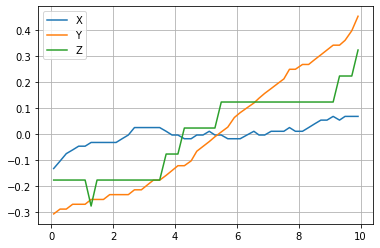

In [17]:
# display(gps_df)

plt.plot(gps_log.gps_df.Wall_Time, gps_log.gps_df.x, label='X')
plt.plot(gps_log.gps_df.Wall_Time, gps_log.gps_df.y, label='Y')
plt.plot(gps_log.gps_df.Wall_Time, gps_log.gps_df.Altitude - gps_log.gps_df["Altitude"].mean(), label='Z')
plt.grid()
plt.legend()
plt.show()

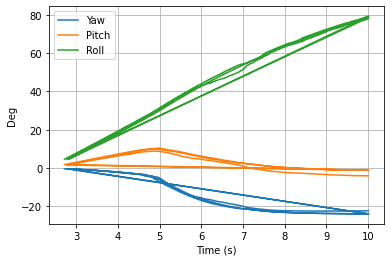

In [18]:
yaws = []
pitches = []
rolls = []
for row in ola_log.ola_df.itertuples():
    qx = row.Q9_1
    qy = row.Q9_2
    qz = row.Q9_3
    qw = math.sqrt( 1.0 - (qx**2 + qy**2 + qz**2))
    
    r = R.from_quat([qx, qy, qz, qw])
    ypr = r.as_euler('zyx', degrees=True)
    
    yaws.append(ypr[0])
    pitches.append(ypr[1])
    rolls.append(ypr[2])
    
ola_log.ola_df['Yaw'] = yaws
ola_log.ola_df['Pitch'] = pitches
ola_log.ola_df['Roll'] = rolls

# display(ola_df)

plt.plot(ola_log.ola_df.Wall_Time, ola_log.ola_df.Yaw, label='Yaw')
plt.plot(ola_log.ola_df.Wall_Time, ola_log.ola_df.Pitch, label='Pitch')
plt.plot(ola_log.ola_df.Wall_Time, ola_log.ola_df.Roll, label='Roll')
plt.xlabel('Time (s)')
plt.ylabel('Deg')
plt.grid()
plt.legend()
plt.show()